In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [145]:
## Loading the dataset

data = pd.read_csv("house_price.csv")

data.head(6)

,area_type,location,society,size,total_sqft,sqft,bath,balcony,possession date,price
0,Super built-up Area,Electronic City Phase II,Coomee,2 BHK,1056,1056.0,2.0,1.0,44192,39.07
1,Plot Area,Chikka Tirupathi,Theanmp,4 Bedroom,2600,2600.0,5.0,3.0,Ready to move,120.00
2,Built-up Area,Uttarahalli,NaN,3 BHK,1440,1440.0,2.0,3.0,Ready to move,62.00
3,Super built-up Area,Lingadheeranahalli,Soiewre,3 BHK,1521,1521.0,3.0,1.0,Ready to move,95.00
4,Super built-up Area,Kothanur,NaN,2 BHK,1200,1200.0,2.0,1.0,Ready to move,51.00
5,Super built-up Area,Whitefield,DuenaTa,2 BHK,1170,1170.0,2.0,1.0,Ready to move,38.00


Information about variable type:

In [146]:
## number of columns in dataset:
data.columns

Index(['area_type', 'location', 'society', 'size', 'total_sqft', 'sqft',
       'bath', 'balcony', 'possession date', 'price'],
      dtype='object')

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13314 entries, 0 to 13313
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        13314 non-null  object 
 1   location         13314 non-null  object 
 2   society          7817 non-null   object 
 3   size             13298 non-null  object 
 4   total_sqft       13314 non-null  object 
 5   sqft             13314 non-null  float64
 6   bath             13241 non-null  float64
 7   balcony          12706 non-null  float64
 8   possession date  13314 non-null  object 
 9   price            13314 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.0+ MB


# Description about the dataset

In [148]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft,13314.0,1817.240548,14278.686970,45.0,1100.0,1277.0,1680.0,1306800.0
bath,13241.0,2.691564,1.339904,1.0,2.0,2.0,3.0,40.0
balcony,12706.0,1.584133,0.817198,0.0,1.0,2.0,2.0,3.0
price,13314.0,112.545076,148.998426,8.0,50.0,72.0,120.0,3600.0


# Checking if there is some null values or not

In [149]:
data.isnull()

,area_type,location,society,size,total_sqft,sqft,bath,balcony,possession date,price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
13309,False,False,False,False,False,False,False,False,False,False
13310,False,False,True,False,False,False,False,True,False,False
13311,False,False,False,False,False,False,False,False,False,False
13312,False,False,False,False,False,False,False,False,False,False


In [150]:
data.isnull().sum()

area_type             0
location              0
society            5497
size                 16
total_sqft            0
sqft                  0
bath                 73
balcony             608
possession date       0
price                 0
dtype: int64

In [151]:
data.iloc[409:411]

,area_type,location,society,size,total_sqft,sqft,bath,balcony,possession date,price
409,Plot Area,Sultan Palaya,NaN,2 Bedroom,550,550.0,1.0,1.0,Ready to move,62.0
410,Super built-up Area,Kengeri,NaN,1 BHK,34.46Sq. Meter,371.0,1.0,0.0,Ready to move,18.5


# Performing Group by operations on Area Type

In [152]:
data.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2414
Carpet  Area              87
Plot  Area              2024
Super built-up  Area    8789
Name: area_type, dtype: int64

# Checking how many different types of "Area Types" are present in the dataset

In [153]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

# Data Visualization

<Axes: xlabel='area_type'>

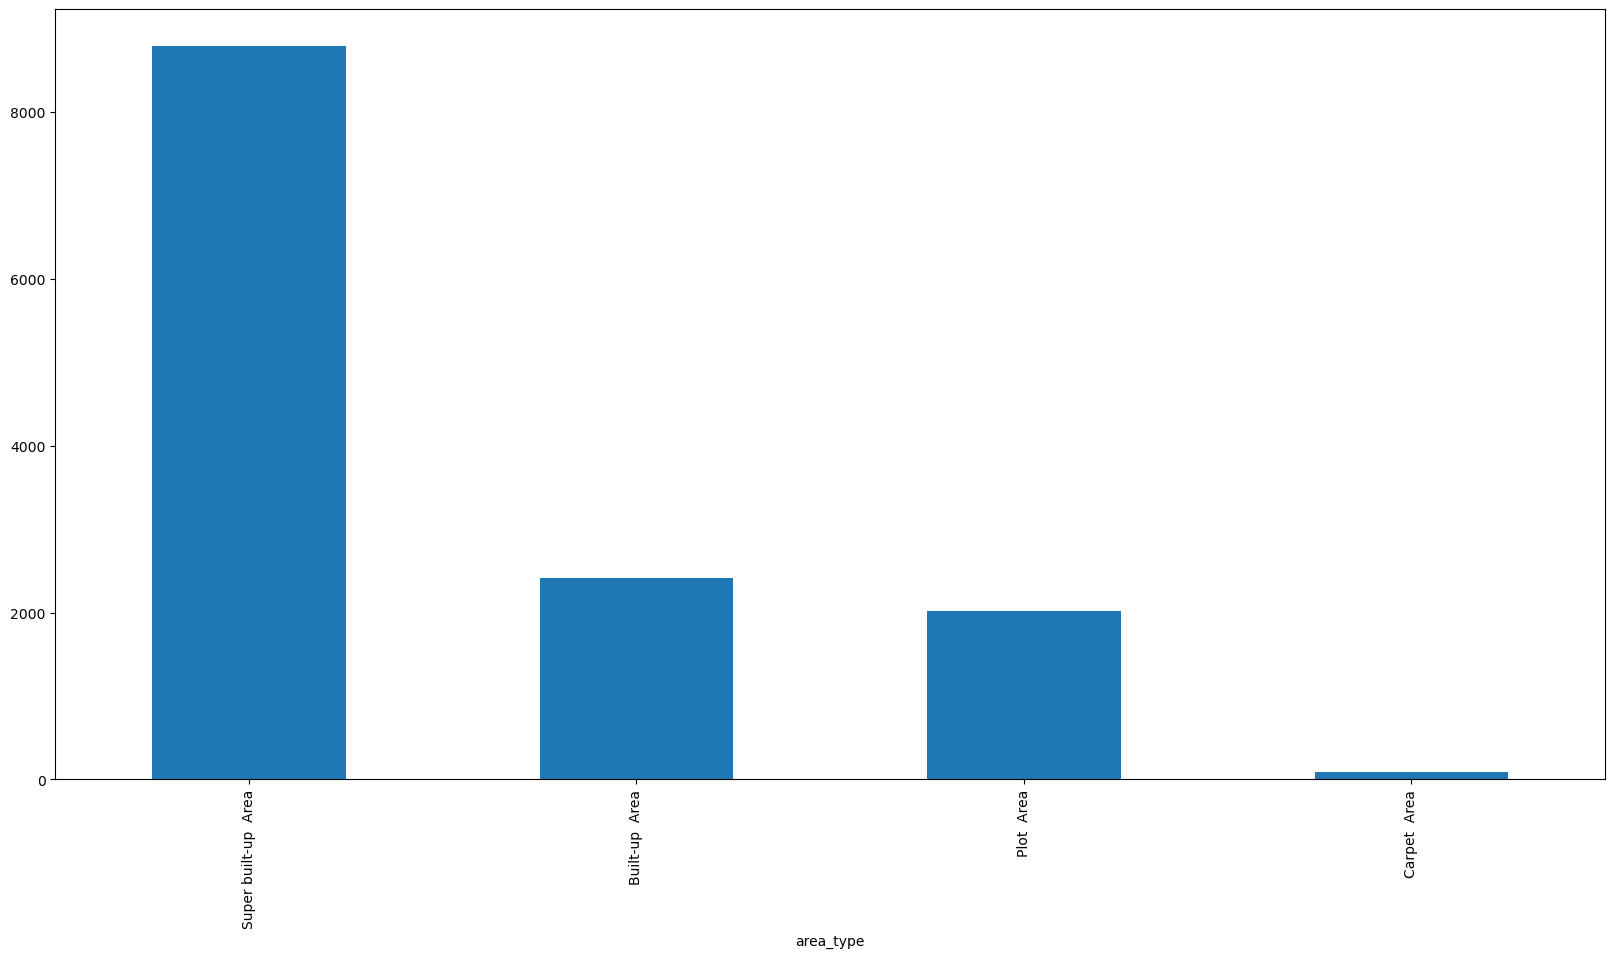

In [154]:
## Count of each area type:
data.area_type.value_counts().plot(kind='bar')

<Axes: xlabel='bath'>

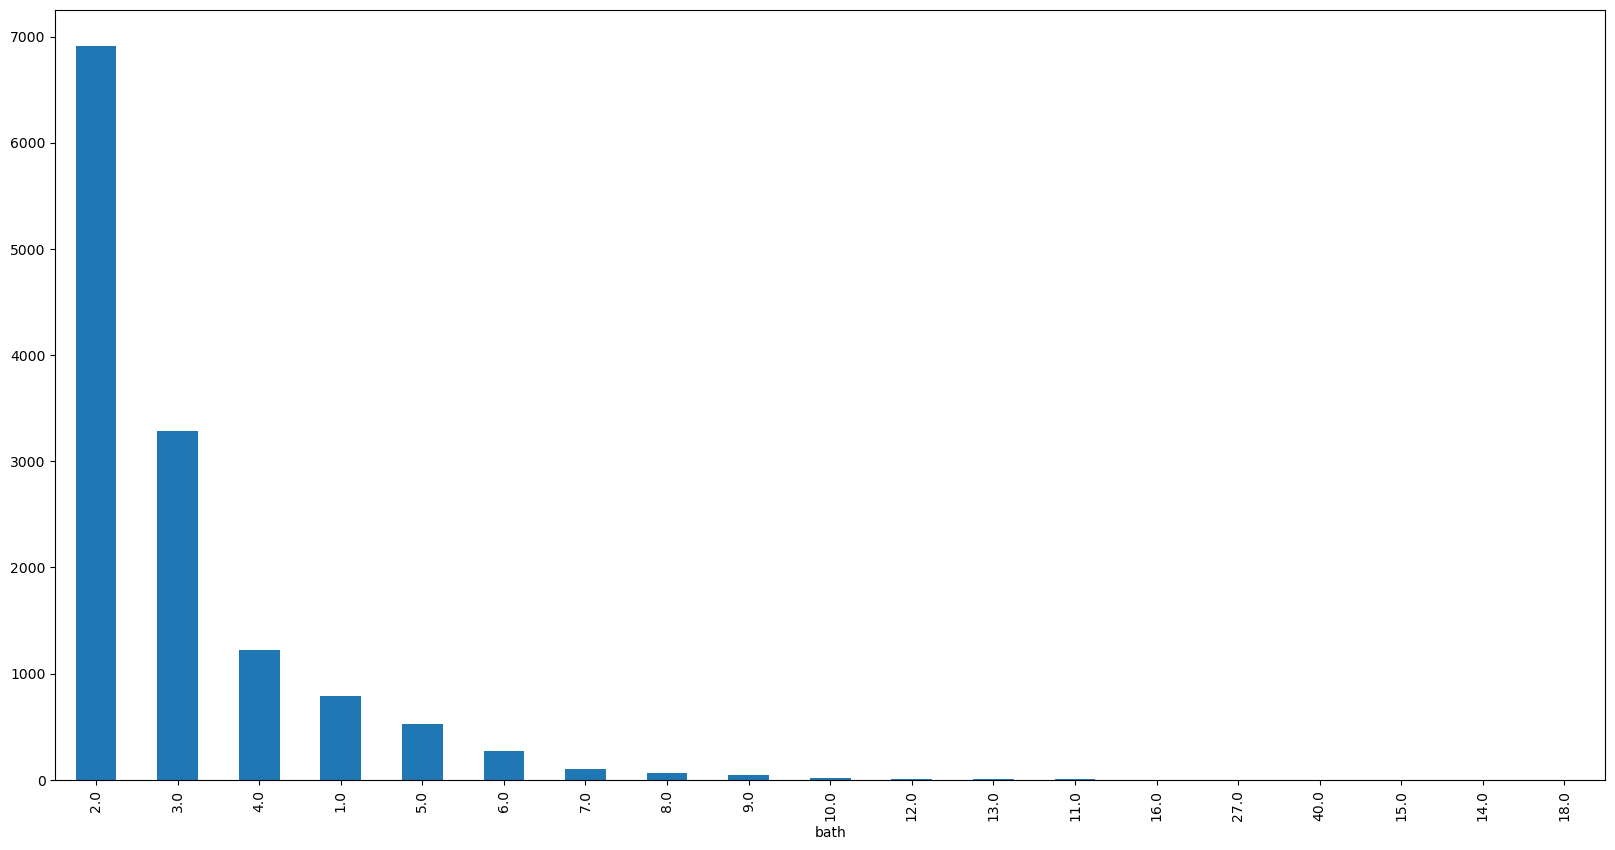

In [155]:
# count of bathroom:
data.bath.value_counts().plot(kind='bar')

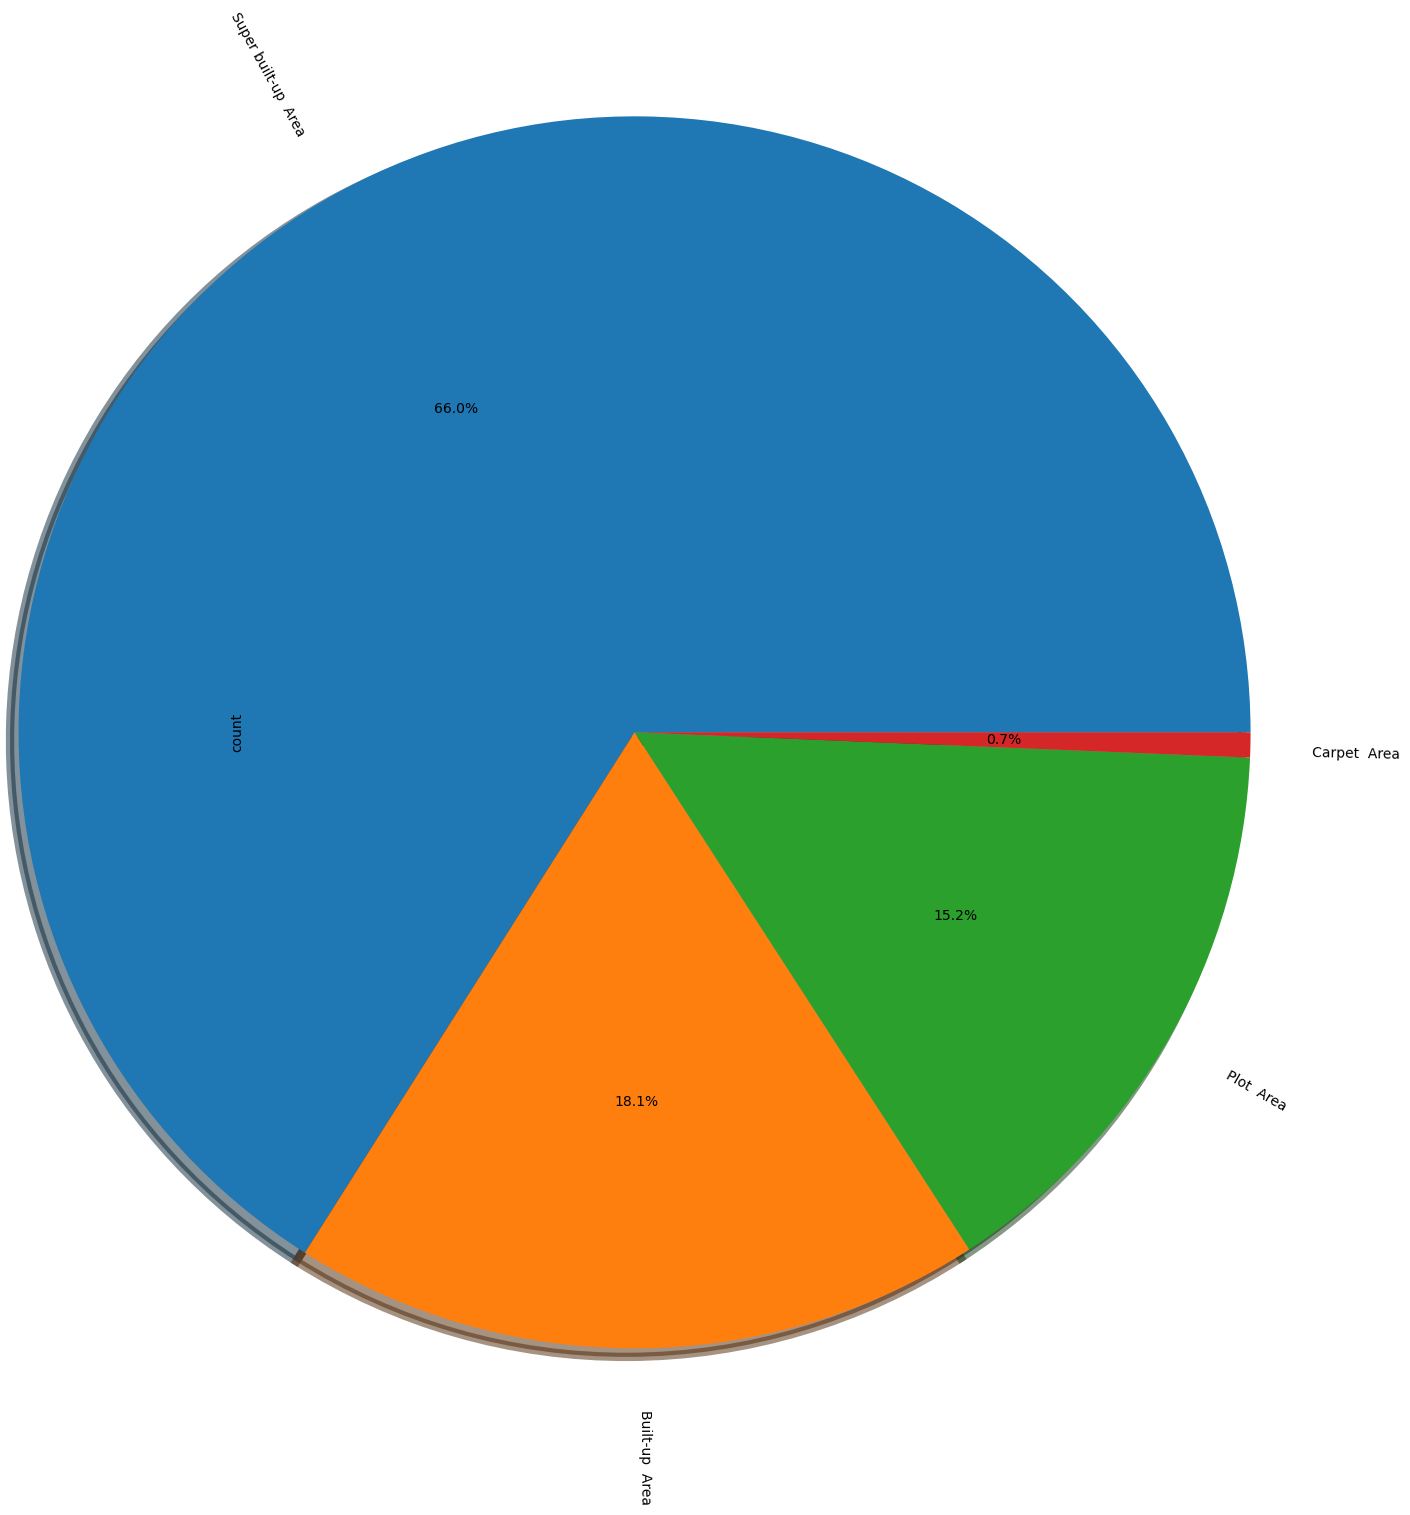

In [156]:
(data["area_type"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True, wedgeprops={'linewidth': 6}, radius=2)
plt.show()

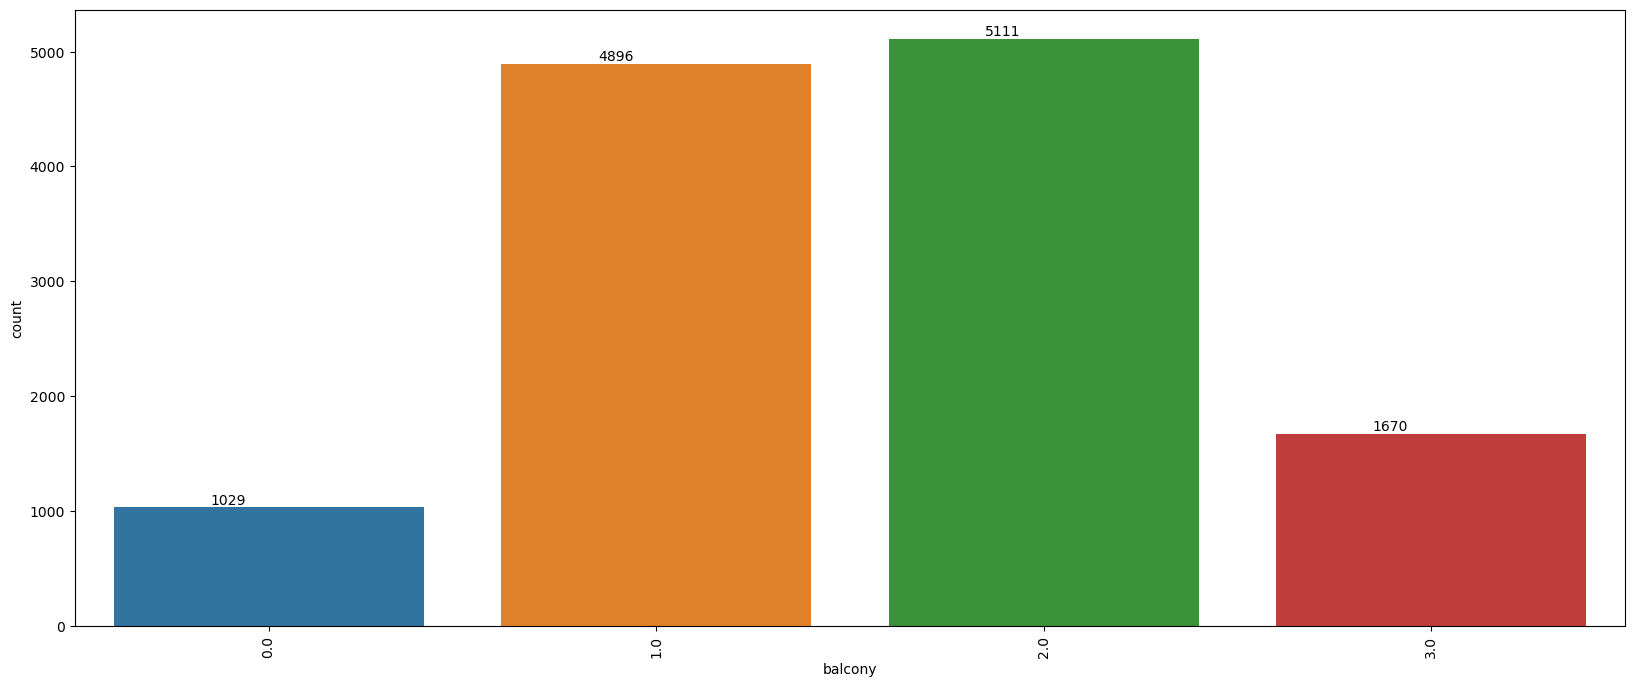

In [157]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'balcony', data = data)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

# Dropping those predictors who has too many null values:

In [158]:
## count null values for each predictors:
counts = data.isna().sum()
print(counts.sort_values())

area_type             0
location              0
total_sqft            0
sqft                  0
possession date       0
price                 0
size                 16
bath                 73
balcony             608
society            5497
dtype: int64


In [159]:
data = data.drop(["area_type","society","balcony","possession date","total_sqft"], axis = "columns")
data.shape

(13314, 5)

In [160]:
data = data.dropna()  ## drop NA values
data.shape

(13241, 5)

In [161]:
data.isnull().sum()

location    0
size        0
sqft        0
bath        0
price       0
dtype: int64

# Data Engineering

In [162]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [163]:
# 'Bedroom' is represented with 2 different methods , BHK and Bedroom. So we are making a new column called BHK.

In [164]:
data['BHK'] = data["size"].apply(lambda x: int(x.split(" ")[0]))

In [165]:
data.head(40)

,location,size,sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


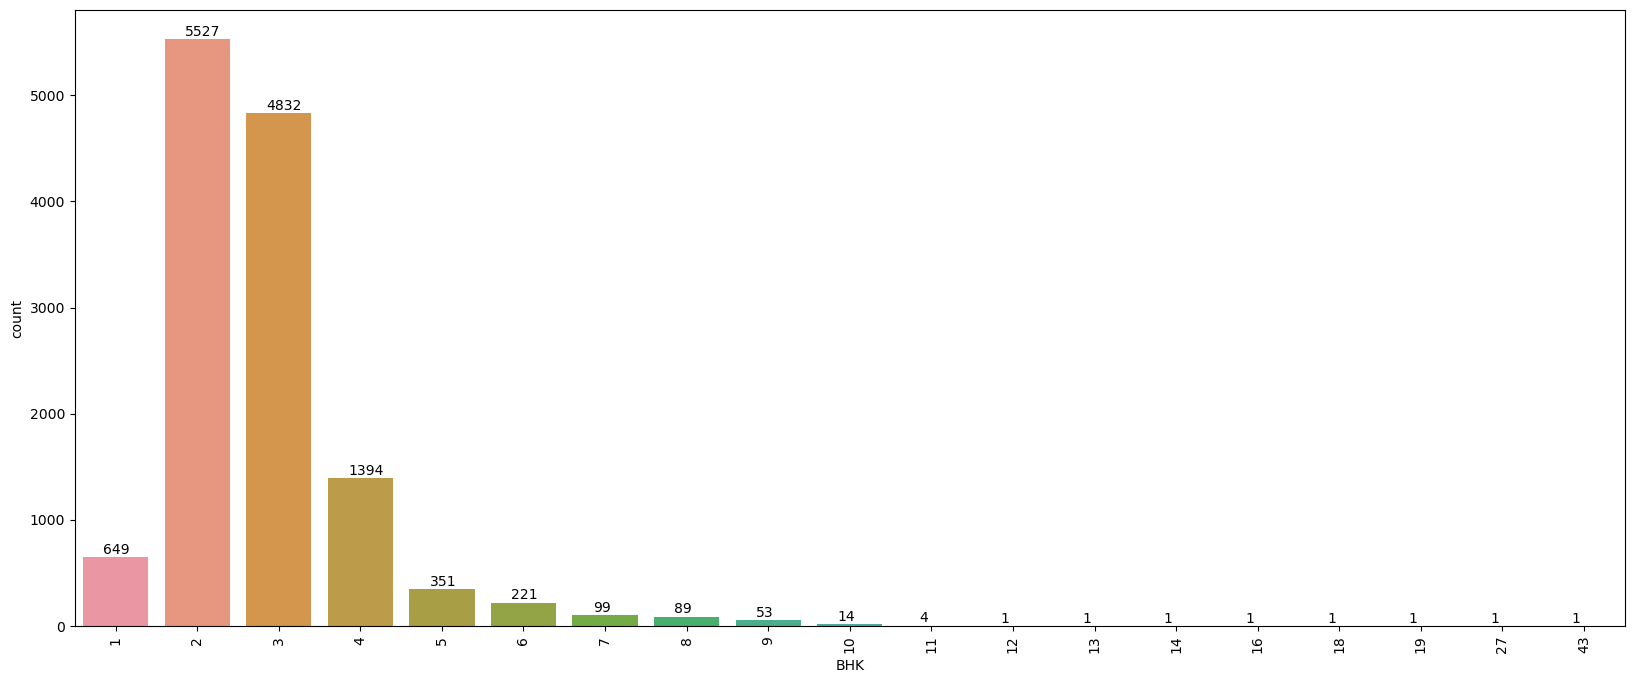

In [166]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'BHK', data = data)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [167]:
data.BHK.unique() # no. of unique BHK in data

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

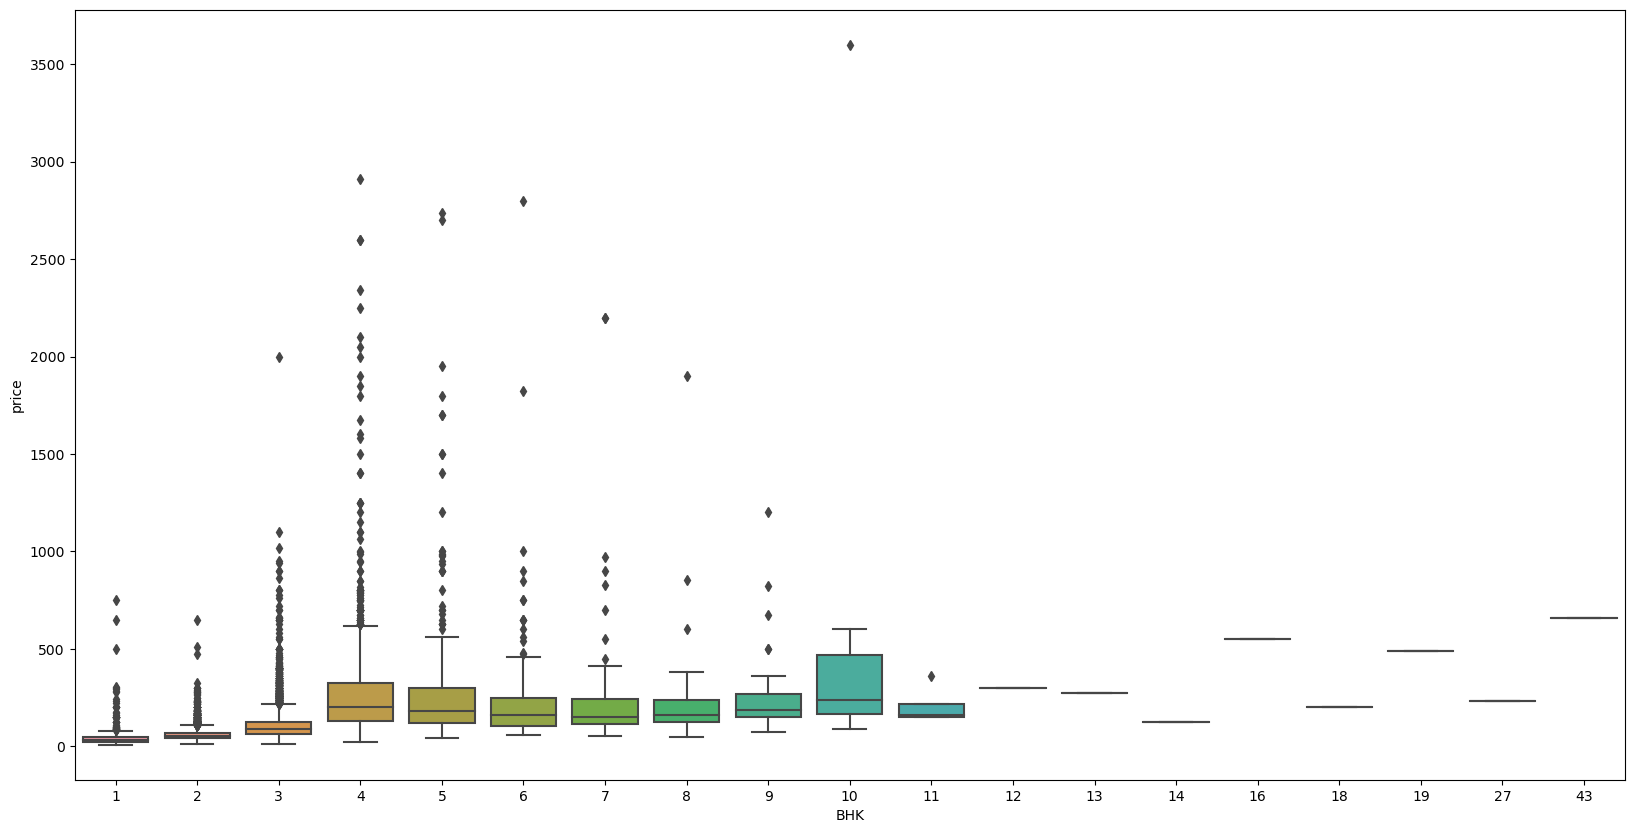

In [168]:
## Boxplot 'BHK' vs 'price'
sns.boxplot(x = 'BHK', y = 'price', data = data)
plt.show()

In [169]:
f = data.sqft.unique()
len(f) ## no. of unique values of sqft

1944

# Data Cleaning

In [170]:
# Example, if a square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. But in data, if you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft¶

In [171]:
data[data.sqft/data.BHK<300] # square ft per bedroom is below 300
data = data[~(data.sqft/data.BHK<300)] ## data square ft per bedroom is equal or greater 300
data.shape

(12500, 6)

In [172]:
data.isnull().values.any()

False

In [173]:
data = data.copy()
data["price_per_sqft"] = data["price"]*100000/data["sqft"]
data.head(10)

,location,size,sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889


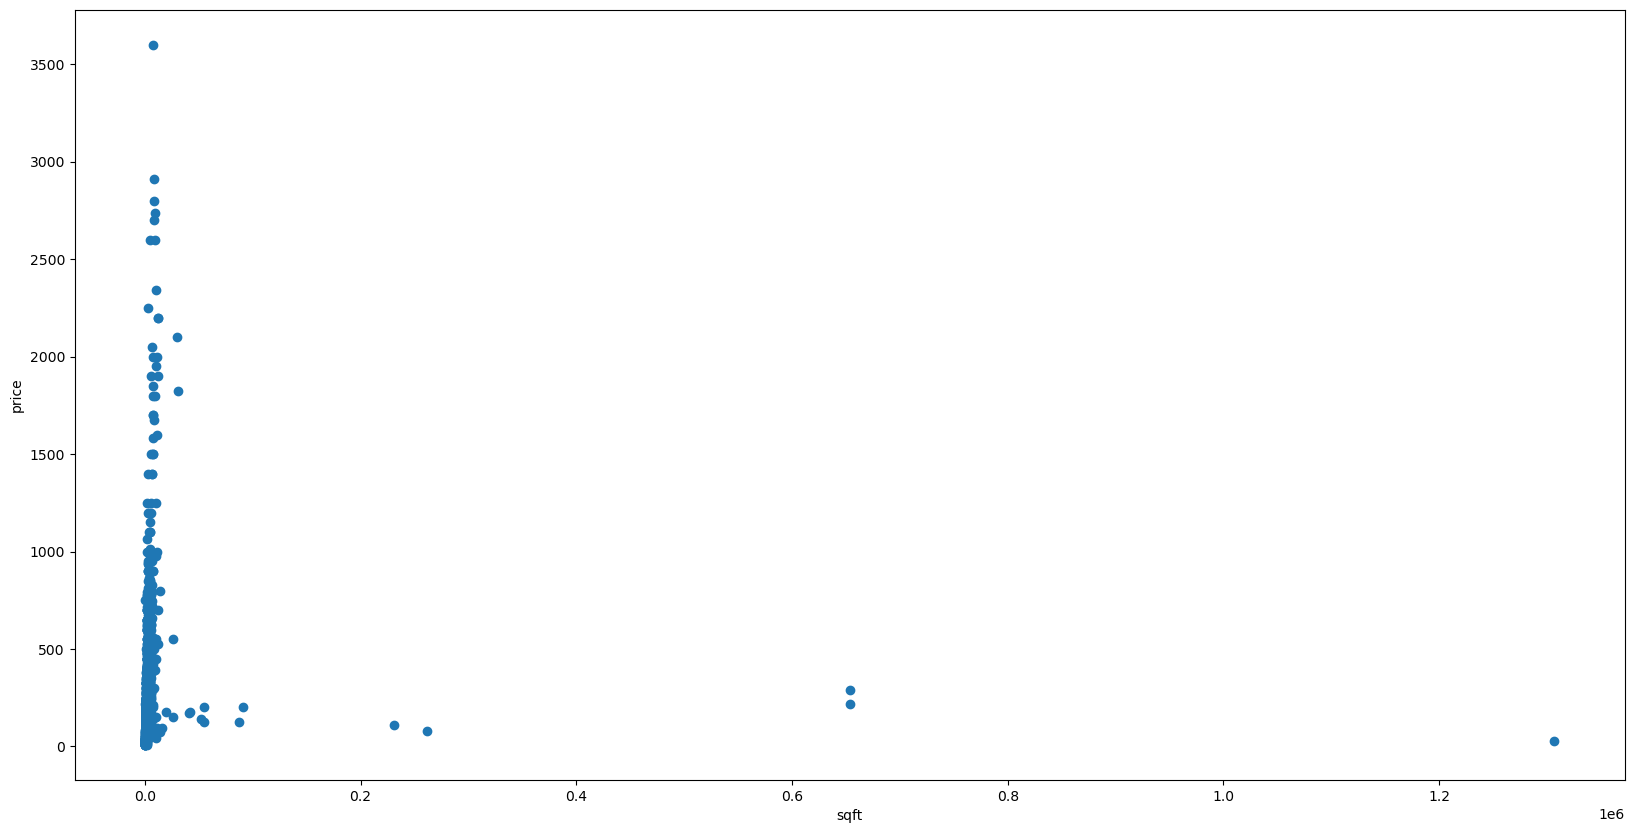

In [174]:
## graph sqft Vs price:
# plotting the points 

#x= np.log(data['sqft'])
#y= np.log(data['price'])

x= data['sqft']
y= data['price']
#plt.plot(x, y)
plt.scatter(x, y)

plt.xlabel('sqft')
# naming the y axis
plt.ylabel('price')
  
# giving a title to my graph
#plt.title('My first graph!')
  
# function to show the plot
plt.show()

In [175]:
## check the number of catagorical and numerical columns:

cols = data.columns

num_cols = data._get_numeric_data().columns

print("\n Numerical columns \n",num_cols) ## numerical columns


cata_col = list(set(cols) - set(num_cols))
print("\n Catagorical columns \n",cata_col)


 Numerical columns 
 Index(['sqft', 'bath', 'price', 'BHK', 'price_per_sqft'], dtype='object')

 Catagorical columns 
 ['size', 'location']


In [176]:
# Here, we are going to use Dimentionality Reduction for the data which are categorical variable. We need to apply Dimensionality Reduction here to reduce number of locations.

In [177]:
## unique values in location columns:
len(data.location.unique())

1221

In [178]:
## frequency or number of counts of a location:
data.location = data.location.apply(lambda x: x.strip())
location_stats = data['location'].value_counts(ascending=False)
location_stats

location
Whitefield                               535
Sarjapur  Road                           389
Electronic City                          295
Kanakpura Road                           264
Thanisandra                              235
                                        ... 
Achins Road                                1
Wajid layout thanisandra                   1
Indranagar  100ft road defence colony      1
Banashankari stage 2                       1
Abshot Layout                              1
Name: count, Length: 1211, dtype: int64

In [179]:
## Identifying those locations whose frequency is equal or less than 10

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
1st Block Jayanagar                      10
Nagappa Reddy Layout                     10
Basapura                                 10
1st Block Koramangala                    10
Sadashiva Nagar                          10
                                         ..
Achins Road                               1
Wajid layout thanisandra                  1
Indranagar  100ft road defence colony     1
Banashankari stage 2                      1
Abshot Layout                             1
Name: count, Length: 988, dtype: int64

In [180]:
## Discarding location_stats_less_than_10:

data.location = data.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data.location.unique())

224

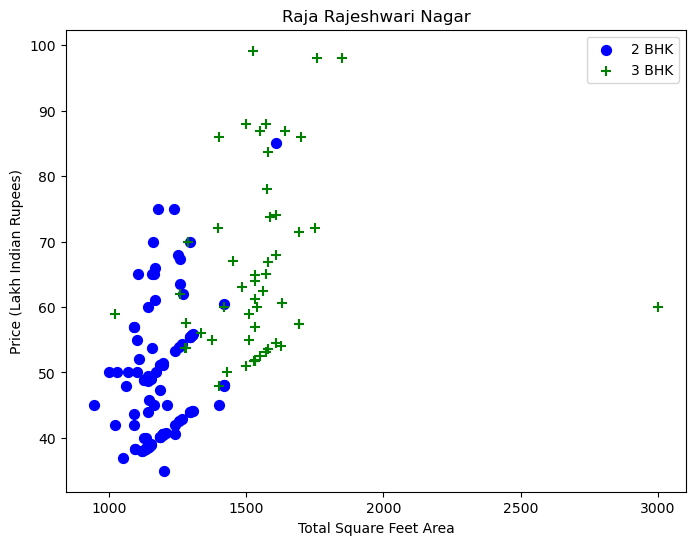

In [181]:
def plot_scatter_chart(data,location):
    bhk2 = data[(data.location==location) & (data.BHK==2)]
    bhk3 = data[(data.location==location) & (data.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data,"Raja Rajeshwari Nagar")

# Ploting the Scatter Chart for log-Total Square Feet Area Vs log-price

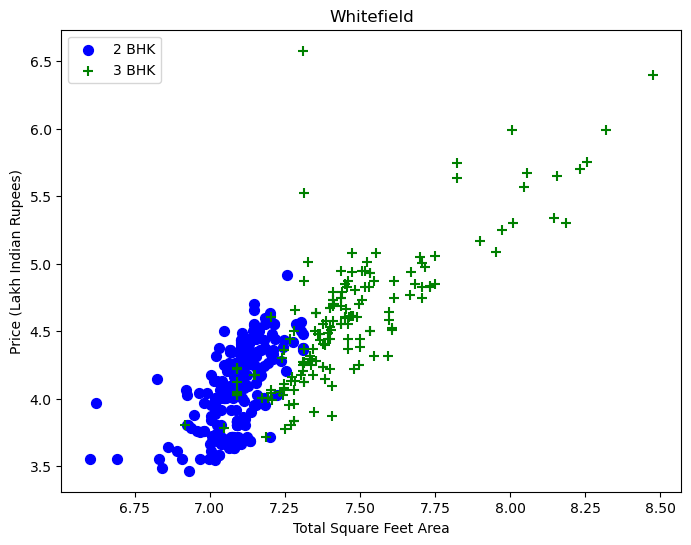

In [182]:
def plot_scatter_chart(data,location):
    bhk2 = data[(data.location==location) & (data.BHK==2)]
    bhk3 = data[(data.location==location) & (data.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(np.log(bhk2.sqft),np.log(bhk2.price),color='blue',label='2 BHK', s=50)
    plt.scatter(np.log(bhk3.sqft),np.log(bhk3.price),marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data,"Whitefield")

In [183]:
## 'price_per_sqft' varies in very wide range.

max(data['price_per_sqft'])


176470.58823529413

In [184]:
min(data['price_per_sqft'])

2.2574227119681667

### Ploting the histogram for Price Per Square Feet vs Count

Text(0, 0.5, 'Count')

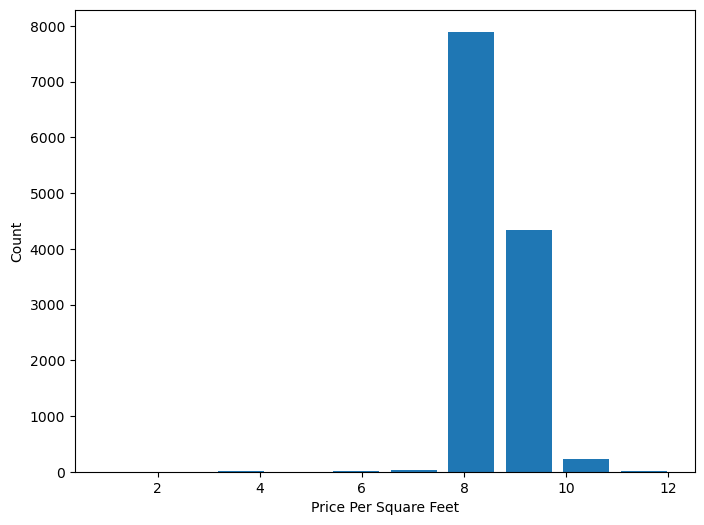

In [185]:
plt.hist(np.log(data.price_per_sqft),rwidth=0.8)
plt.xlabel("Price Per Square Feet")
#plt.hist(data['price_per_sqft'],bins=300)
plt.ylabel("Count")##

### Plotting the Histogram for the number of Bathrooms and Count

Text(0, 0.5, 'Count')

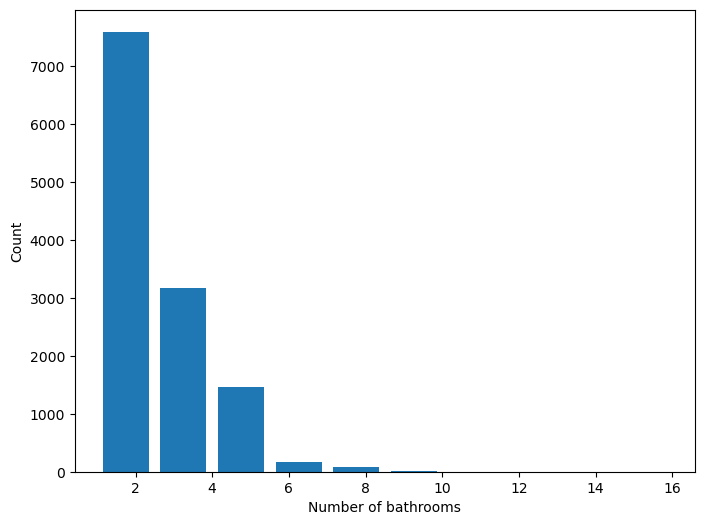

In [186]:
plt.hist(data.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [187]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home. So we are discarding that also.

In [188]:
data[data.bath>10].head(10)

,location,size,sqft,bath,price,BHK,price_per_sqft
1076,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
3093,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3605,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7974,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8631,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9930,other,13 BHK,5425.0,13.0,275.0,13,5069.124424
13061,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


In [189]:
data[data.bath>data.BHK+2]

,location,size,sqft,bath,price,BHK,price_per_sqft
1076,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
2617,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
6833,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
7704,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
9969,other,3 Bedroom,2400.0,6.0,775.0,3,32291.666667
11361,other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12098,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
12438,other,4 Bedroom,4350.0,8.0,2600.0,4,59770.114943
13061,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


### Using One Hot Encoding for Location

In [190]:
dummies = pd.get_dummies(data.location, dtype=int)
dummies.head()
#dummies.isnull().values.any()

,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Concatanating both the data frames together

In [191]:
data = pd.concat([data,dummies.drop('other',axis='columns')],axis='columns')
data.head()

,location,size,sqft,bath,price,BHK,price_per_sqft,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Final dataset to trained model

In [192]:
data = data.drop('location',axis='columns')

In [193]:
data = data.dropna()

In [194]:
X = data.drop(['price'],axis='columns')

In [195]:
X = X.drop(['size'],axis='columns')

In [196]:
X = X.drop(['price_per_sqft'],axis='columns')
X.head()

,sqft,bath,BHK,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
X.shape

(12500, 226)

In [198]:
X.isna().sum() 

sqft                         0
bath                         0
BHK                          0
1st Phase JP Nagar           0
2nd Phase Judicial Layout    0
                            ..
Yelachenahalli               0
Yelahanka                    0
Yelahanka New Town           0
Yelenahalli                  0
Yeshwanthpur                 0
Length: 226, dtype: int64

In [200]:
X.shape

(12500, 226)

In [199]:
y = data.price
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

### Train-test split

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [202]:
from sklearn import datasets, linear_model, metrics

# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
#print('Coefficients: ', reg.coef_)

LinearRegression()

In [203]:
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.3832234502267289


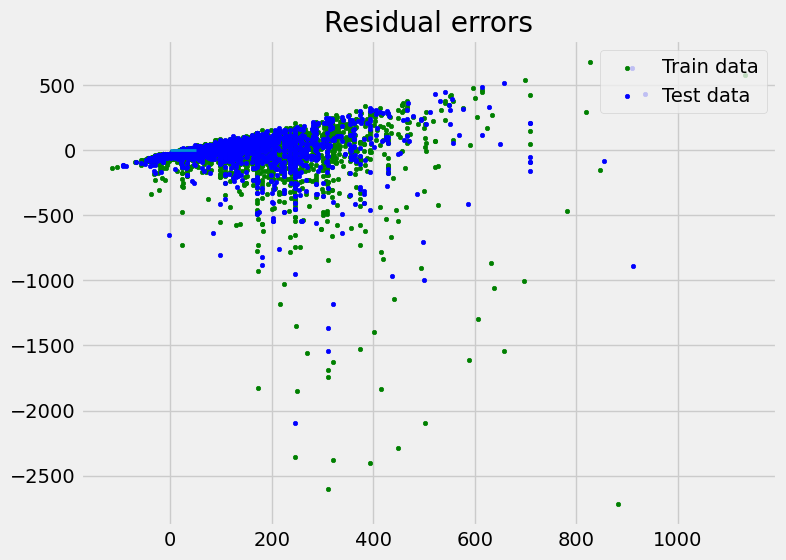

In [204]:
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [205]:

import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.557
Model:                            OLS   Adj. R-squared (uncentered):              0.545
Method:                 Least Squares   F-statistic:                              47.43
Date:                Sun, 16 Mar 2025   Prob (F-statistic):                        0.00
Time:                        16:16:38   Log-Likelihood:                         -54930.
No. Observations:                8750   AIC:                                  1.103e+05
Df Residuals:                    8524   BIC:                                  1.119e+05
Df Model:                         226                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [206]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return reg.predict([x])[0]

In [209]:
predict_price('Hennur',1000, 2, 2)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


45.101539094625295